# Chapter 18 - Persistence Model for Forecasting

Establishing a baseline is essential on any time series forecasting problem. A baseline in performance gives you an idea of how well all other models will actually perform on your problem.

After completing this tutorial, you will know:
- The **importance of calculating a baseline of performance** on time series forecast problems.
- How to develop a persistence model from scratch in Python.
- How to evaluate the forecast from a persistence model and use it to establish a baseline in performance.

## 18.1 Forecast Performance Baseline
A baseline in forecast performance provides a point of comparison. It is a point of reference for all other modeling techniques on your problem.

Before you can establish a performance baseline on your forecast problem, you must develop a test harness. This is comprised of:
1. The dataset you intend to use to train and evaluate models.
2. The resampling technique you intend to use to estimate the performance of the technique (e.g. train/test split).
3. The performance measure you intend to use to evaluate forecasts (e.g. root mean squared error).

The goal is to get a baseline performance on your time series forecast problem as quickly as possible so that you can get to work better understanding the dataset and developing more advanced models

## 18.2 Persistence Algorithm

The most common baseline method for supervised machine learning is the Zero Rule algorithm. This algorithm predicts the majority class in the case of classication, or the average outcome in the case of regression. This could be used for time series, but does not respect the serial correlation structure in time series datasets.

The persistence algorithm uses the value at the current time step (t) to predict the expected outcome at the next time step (t+1).

## 18.3 Shampoo Sales Dataset
This dataset describes the monthly number of sales of shampoo over a 3 year period.

## 18.4 Persistence Algorithm Steps

A persistence model can be implemented easily in Python. We will break this tutorial down into 4 steps:
1. Transform the univariate dataset into a supervised learning problem.
2. Establish the train and test datasets for the test harness.
3. Dene the persistence model.
4. Make a forecast and establish a baseline performance.
5. Review the complete example and plot the output.

## 18.4.1 Step 1: Define the Supervised Learning Problem

In [32]:
# calculate a train-test split of a time series dataset
from pandas import read_csv
from pylab import rcParams
from pandas import datetime

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

csvfile = '.\\code\\chapter_18\\shampoo-sales.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.head(5)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

In [33]:
import pandas as pd
# Create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

t    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


In [34]:
# ds_adj = dataframe.loc[1:len(dataframe)]

This snippet creates the dataset and prints the rst 5 rows of the new dataset. We can see that the rst row (index 0) will have to be discarded as there was no observation prior to the rst observation to use to make the prediction. From a supervised learning perspective, the t column is the input variable, or X, and the t+1 column is the output variable, or y.

## 18.4.2 Step 2: Train and Test Sets

The next step is to separate the dataset into train and test sets. We will keep the rst 66% of the observations for training and the remaining 34% for evaluation. During the split, we are careful to exclude the rst row of data with the NaN value.

In [35]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

## 18.4.3 Step 3: Persistence Algorithm
We can define our persistence model as a function that returns the value provided as input. For example, if the t value of 266.0 was provided, then this is returned as the prediction, whereas the actual real or expected value happens to be 145.9 (taken from the first usable row in our lagged dataset).

In [36]:
# persistence model
def model_persistence(x):
    return x

## 18.4.4 Step 4: Make and Evaluate Forecast

Now we can evaluate this model on the test dataset. We do this using the walk-forward validation method. No model training or retraining is required, so in essence, we step through the test dataset time step by time step and get predictions. Once predictions are made for each time step in the test dataset, they are compared to the expected values and a Root Mean Squared Error (RMSE) score is calculated.

In [37]:
import math 
from sklearn.metrics import mean_squared_error

# walk-forward validation
predictions = list()

for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

rmse = math.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 133.156


## 18.4.5 Step 5: Complete Example

Finally, a plot is made to show the training dataset and the diverging predictions from the expected values from the test dataset. From the plot of the persistence model predictions, it is clear that the model is one-step behind reality. There is a rising trend and month-to-month noise in the sales gures, which highlights the limitations of the persistence technique.

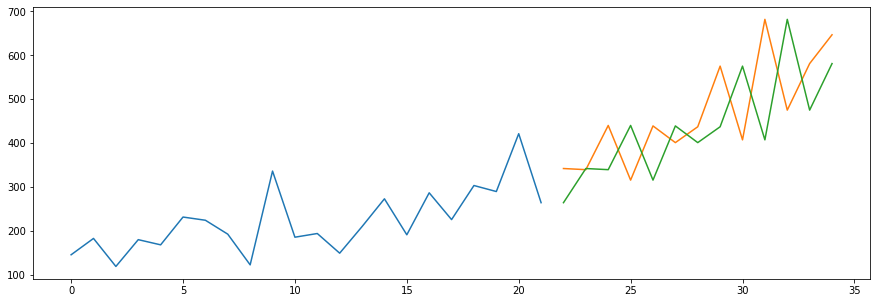

In [38]:
from matplotlib import pyplot
from pylab import rcParams

%matplotlib inline

rcParams['figure.figsize'] = 15, 5
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

We have seen an example of the persistence model developed from scratch for the Shampoo Sales problem. The persistence algorithm is naive. It is often called the naive forecast. It assumes nothing about the specics of the time series problem to which it is applied. This is what makes it so easy to understand and so quick to implement and evaluate. As a machine learning practitioner, it can also spark a large number of improvements. Write them down. This is useful because these ideas can become input features in a feature engineering eort or simple models that may be combined in an ensembling eort later.